# 03 - Classification

The goal of this exercise is to to develop an understanding how to train a binary classifier and how to measure its performance with different performance metrics.

<div class="alert alert-block alert-info">
To solve this notebook you need the knowledge from the previous notebook. If you have problems solving it, take another look at last week's notebook.
    
It's also recommended to read the chapter 3 of the book in advance.
</div>

**Task**: In this exercise, we want to use pictures of banknotes to identify whether they are forged or not.

In [1]:
# Run this cell two import the following modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# set seaborn plot size globally
sns.set(rc={'figure.figsize':(11,6)})

<h2 style="color:blue" align="left">Banknote Authentication Data Set</h2>

For this we use a public available dataset called [_banknote authentication Data Set_](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#). This dataset was created by two researchers of the University of Applied Sciences in Ostwestfalen-Lippe. They took 1372 images of genuine and forged banknote-like specimens with an industrial camera usually used for print inspection and applied a Wavelet Transformation on them. Then they extracted 4 features of the images:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)

The last column shows if the banknote is valid or fake:

- class 0 is genuine / authentic
- class 1 is fake / forgery


In [2]:
dataset = pd.read_csv('dataset/data_banknote_authentication.csv')
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<div class="alert alert-block alert-success"><b>Task</b><br> 
Find a way to count how many fake and how many real banknotes are in the dataset.
</div>

In [3]:
# Write Your Code Here
dataset['class'].value_counts() # 0 -> real, 1 -> fake

0    762
1    610
Name: class, dtype: int64

<h2 style="color:blue" align="left">Data Preprocessing</h2>

### Train Test Split

After we inspect the data, we can split our data in a test set and training set. Therefore we use the built in function of SciKit-learn `train_test_split`. 

In [4]:
from sklearn.model_selection import train_test_split

<div class="alert alert-block alert-success"><b>Task</b><br>
Use the train_test_split function, to split up dataset. The test set should consists of 20% of the total data data. Save the results in the variables X_train, X_test, y_train and y_test. Set the variable random_state = 42.
</div>

In [5]:
X, y = [], []
X_train, X_test, y_train, y_test = [], [], [], []
# Write Your Code Here
X = dataset.drop('class', axis=1)
y = dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097,), (275,))

### Scale the data

Because the data is given is different units, we must scale it. Therefor, we use the built-in class `StandardScaler` of SciKit-learn.

In [7]:
from sklearn.preprocessing import StandardScaler

<div class="alert alert-block alert-success"><b>Task</b><br>
Scale the training and test set with the StandardScaler sc. Save the results in the variables X_train_scaled and X_test_scaled.
</div>

In [8]:
sc = StandardScaler()
X_train_scaled, X_test_scaled = [], []
# Write Your Code Here
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

<h2 style="color:blue" align="left">Train and Evaluate your Model</h2>

Now that we're done with the preprocessing, we can start to train and evaluate your model. In this exercises, we will use the SGDClassifier of SciKit-learn. By default, this functions fits a linear support vector machine (SVM) with stochastic gradient descent (SGD) learning. These terms will be discussed in the next lectures.

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(random_state=42)

### Accuracy with Cross Validation

After we have fit your model to the data, we can start to evaluate it. For this we use the cross validation score, like in the book.

In [11]:
from sklearn.model_selection import cross_val_score

<div class="alert alert-block alert-success"><b>Task</b><br>
Evaluate the model, using the cross_val_score function of SciKit-learn. Make a 3-Fold cross validation using your training set.
</div>

In [12]:
# Write Your Code Here
scores = cross_val_score(sgd_clf, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=3)

In [13]:
scores

array([-0.00546448, -0.02185792, -0.02739726])

Wow, all these predictions are more than 97% correct. In fact, that we have nearly an equal number of fake and real banknotes in your training set, this is a really good result. But as we've learned in the book, there are more metrics to measure the performance of your model.

### Make some Predictions

To apply this metrics to your model, we need to make some predictions and save them for further investigations. Therefore we use the function `cross_val_predict` of SciKit-learn.

In [14]:
from sklearn.model_selection import cross_val_predict

<div class="alert alert-block alert-success"><b>Task</b><br>
Use the function cross_val_predict to predict the data of your training set using a 3 folds. Save the result in the variable y_train_pred.
</div>

In [15]:
y_train_pred = []
# Write Your Code Here
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

### Confusion Matrix

When have the predicted values `y_train_pred`, we can compare them with the truth values `y_train` and plot a confusion matrix.

In [16]:
from sklearn.metrics import confusion_matrix

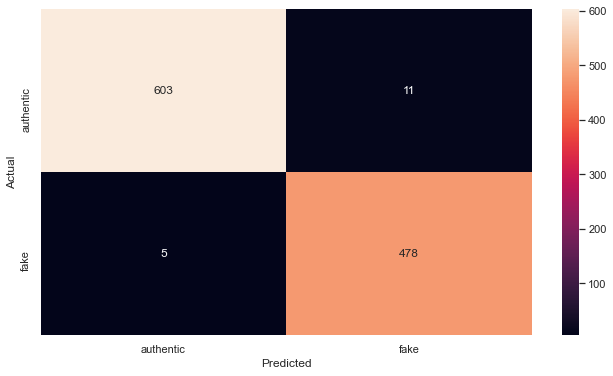

In [17]:
tickLabels = ['authentic', 'fake']
ax = sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", yticklabels=tickLabels, xticklabels=tickLabels,)
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12);

The confusion matrix has the following notation.

$ \text{confusion matrix} =
\begin{pmatrix}
TN & FP \\
FN & TP
\end{pmatrix}
$

On the upper left, we have the True Negatives (_TN_). That are the values that were correctly predicted as negatives. Because negative ($0$) is the class _authentic_, we can see the number of authentic banknotes, that are correctly predicted as authentic. To the right are the False Positives (_FP_). These are the authentic banknotes that were wrongly labeled as positives ($1$), i.e. fake.

On the lower left, you can see the False Negatives, i.e. the fake banknotes that are wrongly predicted as authentic and on the lower right, there are the number of fake banknotes, that are correctly predicted as fake (_TP_).

All in all we have a very good prediction, because on the diagonal are only large numbers and only 20 predictions are wrong. 

### Precision and Recall

The precision and recall are another metric to measure to performance of your model. They can be directly computed from the values in the confusion matrix.

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

#### Precision

The precision describes what proportion of positive identifications was actually correct.

It can be computed as follows:

$\text{precision} = \frac{TP}{TP+FP}$

You can also use the built-in function of Scikit-learn `precision_score`.

<div class="alert alert-block alert-success"><b>Task</b><br>
Use the function precision_score to calculate the precision of your model.
</div>

In [19]:
# Write Your Code Here
print('Model precision:\t', precision_score(y_train, y_train_pred))

Model precision:	 0.9775051124744376


#### Recall

The recall describes what proportion of actual positives was identified correctly.

It can be computed as follows:

$\text{recall} = \frac{TP}{TP+FN}$

You can also use the built-in function of Scikit-learn `recall_score`.

<div class="alert alert-block alert-success"><b>Task</b><br>
Use the function recall_scare to calculate the recall of your model.
</div>

In [20]:
# Write Your Code Here
print('Model recall:\t', recall_score(y_train, y_train_pred))

Model recall:	 0.989648033126294


The F1-Score score is the harmonic mean of the precision and recall. SciKit-learn has a built-it in function for this, too.

In [21]:
print('F1 score:\t', f1_score(y_train, y_train_pred))

F1 score:	 0.9835390946502057


### Make Adjustments to your Model

The goal of your classifier is to not accept any fake banknotes. Because of the Precision/Recall Trade-off this means, that we will mark some real banknotes as fake. Since the fake banknotes are labeled with $1$, we don't want to have false negatives (_FN_), so we want high _Recall_.


In [22]:
from sklearn.metrics import precision_recall_curve

<div class="alert alert-block alert-success"><b>Task</b><br>
Use the function precision_recall_curve to find a threshold, so that your model won't accept any fake banknotes. Save the threshold in the variable threshhold_highest_recall. If you are not sure, how to do it, have another look at the third chapter of the book.
</div>

In [23]:
threshold_highest_recall = 0 # SGDClassifier threshold is 0 by default

# with these scores you can compute precision and recall
# for all possible thresh‐ olds using the precision_recall_curve()
y_scores = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, method="decision_function")

# Write Your Code Here
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel('Threshold', fontsize=16)
    plt.ylabel('Rate', fontsize=16)
    plt.legend(fontsize=16)

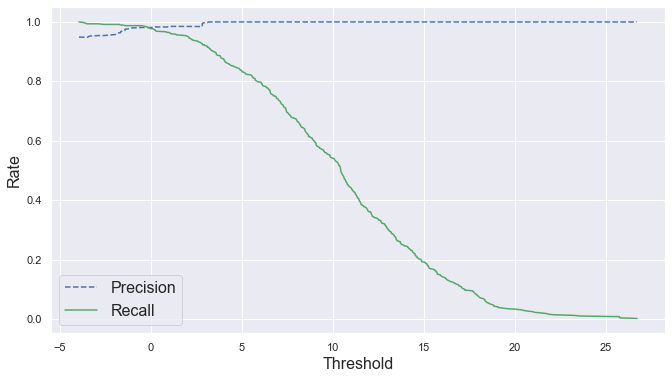

In [25]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

You can use this threshold to make new predictions of your model

In [26]:
y_pred_recall = (y_scores >= 100)
confusion_matrix(y_train, y_pred_recall)

array([[614,   0],
       [483,   0]])

Hey, as we can see, there are no False Negatives any more. Great! 

But there also more False Positives, so we marked 26 authentic banknotes as fake. This leads to a smaller precision.

In [27]:
precision_score(y_train, y_pred_recall)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

### ROC-Curve and AUC-Score

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate (TPR), where $\text{TPR} = \frac{TP}{TP+FN}$, also known als recall and
- False Positive Rate (FPR), where $\text{FPR} = \frac{FP}{FP+TN}$.

SciKit-learn provides a build-in function called `roc_curve` to compute the rates at the different thresholds.

In [28]:
from sklearn.metrics import roc_curve

In [29]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

The following code plots the graph.

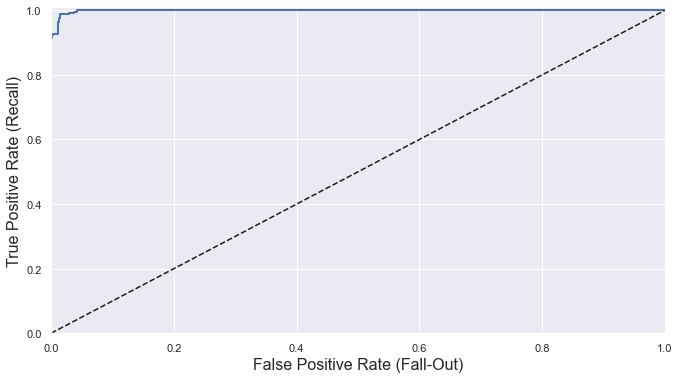

In [30]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1.01])  
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)  
    plt.grid(True)

plot_roc_curve(fpr, tpr)

plt.show()

As we can see, we have a really perfect course of the curve, because we are very far in the upper left corner. The Area under the curve is called AUC_score can the computed with the roc_auc_score.

In [31]:
from sklearn.metrics import roc_auc_score

<div class="alert alert-block alert-success"><b>Task</b><br>
Use the function roc_auc_score to compute the AUC-Score.
</div>

In [32]:
# Write Your Code Here
print('Area under the curve (AUC):\t', roc_auc_score(y_train, y_scores))

Area under the curve (AUC):	 0.9987692286941685


<div class="alert alert-block alert-success">
A perfect classifier would have an AUC of 1. <br>
A random classifier would have an AUC of 0.5. <br>
So greater AUC value means high quality classifier. <br>
</div>

Finally test your model with the test set. 

<div class="alert alert-block alert-success"><b>Task</b><br>
Evaluate accuracy, precision and recall for the test set. 
</div>

In [33]:
# Write Your Code Here

# evaluate model
test_scores = cross_val_score(sgd_clf, X_test_scaled, y_test, scoring='neg_mean_squared_error', cv=3)
test_scores

array([-0.02173913, -0.02173913, -0.07692308])

Text(0.5, 1.0, 'Test Data Confusion Matrix')

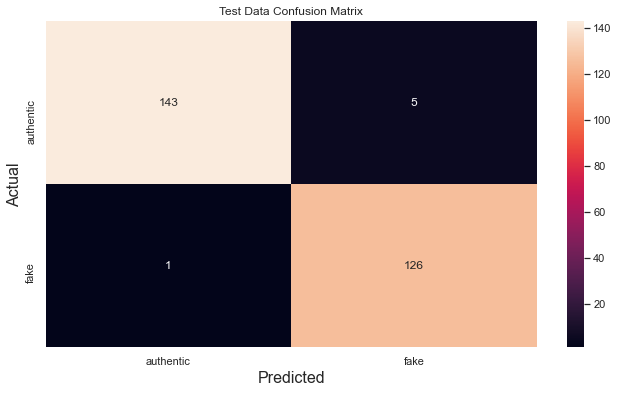

In [34]:
# confusion matrix
y_test_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3)

tickLabels = ['authentic', 'fake']
ax = sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", yticklabels=tickLabels, xticklabels=tickLabels,)
ax.set_xlabel('Predicted', fontsize=16)
ax.set_ylabel('Actual', fontsize=16);
plt.title('Test Data Confusion Matrix')

In [35]:
# precision, recall, f1
print('Model precision:\t', precision_score(y_test, y_test_pred))
print('Model recall:\t\t', recall_score(y_test, y_test_pred))
print('F1 score:\t\t\t', f1_score(y_test, y_test_pred))

Model precision:	 0.9618320610687023
Model recall:		 0.9921259842519685
F1 score:			 0.9767441860465117


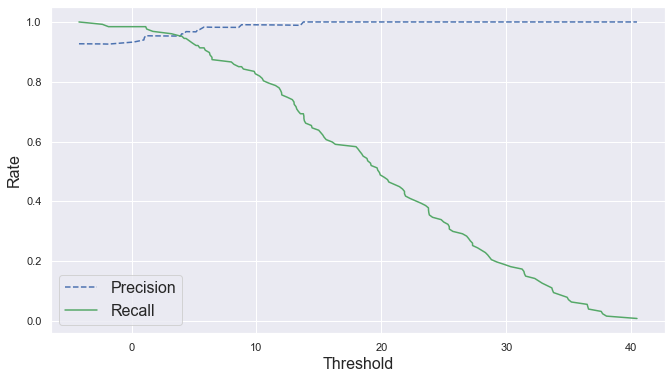

In [36]:
# precision recall curve
y_test_scores = cross_val_predict(sgd_clf, X_test_scaled, y_test, cv=3, method="decision_function")
test_precisions, test_recalls, test_thresholds = precision_recall_curve(y_test, y_test_scores)

plot_precision_recall_vs_threshold(test_precisions, test_recalls, test_thresholds)

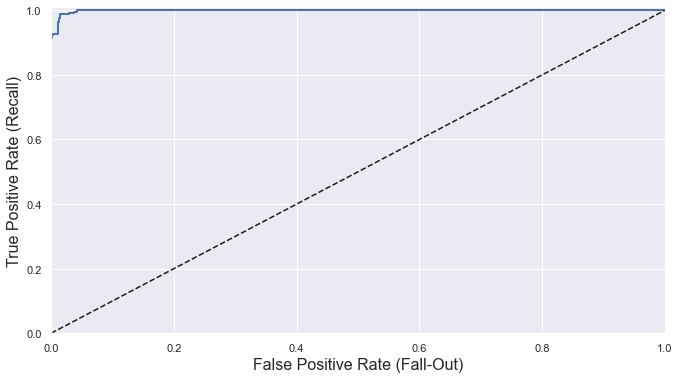

In [37]:
# compute receiver operating characteristic (ROC) curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_train, y_scores)

plot_roc_curve(test_fpr, test_tpr)
plt.show()